In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [3]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [4]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [5]:
df = df[['PM2.5','year','month','day','hour']]
df

,PM2.5,year,month,day,hour
0,4.0,2013,3,1,0
1,8.0,2013,3,1,1
2,7.0,2013,3,1,2
3,6.0,2013,3,1,3
4,3.0,2013,3,1,4
...,...,...,...,...,...
35059,12.0,2017,2,28,19
35060,13.0,2017,2,28,20
35061,16.0,2017,2,28,21
35062,21.0,2017,2,28,22


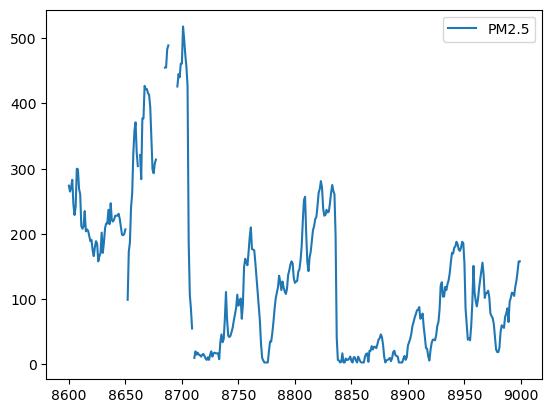

In [6]:
plt.plot(df['PM2.5'][8600:9000],label='PM2.5')
plt.legend()

In [7]:
# fill out missing values using interpolation
df['PM2.5'].interpolate(inplace=True)

C:\Users\kpk16\AppData\Local\Temp\ipykernel_39628\3603739570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PM2.5'].interpolate(inplace=True)


In [8]:
df.isnull().sum()

PM2.5    0
year     0
month    0
day      0
hour     0
dtype: int64

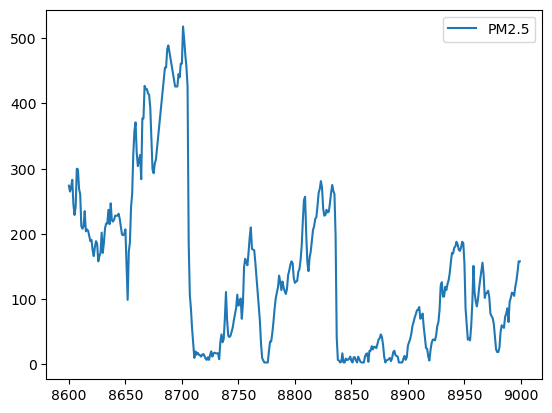

In [9]:
plt.plot(df['PM2.5'][8600:9000],label='PM2.5')
plt.legend()

In [10]:
df.describe()

,PM2.5,year,month,day,hour
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,82.540623,2014.662560,6.522930,15.729637,11.500000
std,81.956401,1.177213,3.448752,8.800218,6.922285
min,3.000000,2013.000000,1.000000,1.000000,0.000000
25%,22.000000,2014.000000,4.000000,8.000000,5.750000
50%,58.000000,2015.000000,7.000000,16.000000,11.500000
75%,114.000000,2016.000000,10.000000,23.000000,17.250000
max,898.000000,2017.000000,12.000000,31.000000,23.000000


In [11]:
df

,PM2.5,year,month,day,hour
0,4.0,2013,3,1,0
1,8.0,2013,3,1,1
2,7.0,2013,3,1,2
3,6.0,2013,3,1,3
4,3.0,2013,3,1,4
...,...,...,...,...,...
35059,12.0,2017,2,28,19
35060,13.0,2017,2,28,20
35061,16.0,2017,2,28,21
35062,21.0,2017,2,28,22


In [12]:
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24.0)
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
df['day_sin'] = np.sin(2 * np.pi * df['day']/31)
df['day_cos'] = np.cos(2 * np.pi * df['day']/31)

C:\Users\kpk16\AppData\Local\Temp\ipykernel_39628\1055069242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24.0)
C:\Users\kpk16\AppData\Local\Temp\ipykernel_39628\1055069242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24.0)
C:\Users\kpk16\AppData\Local\Temp\ipykernel_39628\1055069242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [13]:
df.head()

,PM2.5,year,month,day,hour,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
0,4.0,2013,3,1,0,0.000000,1.000000,1.0,6.123234e-17,0.201299,0.97953
1,8.0,2013,3,1,1,0.258819,0.965926,1.0,6.123234e-17,0.201299,0.97953
2,7.0,2013,3,1,2,0.500000,0.866025,1.0,6.123234e-17,0.201299,0.97953
3,6.0,2013,3,1,3,0.707107,0.707107,1.0,6.123234e-17,0.201299,0.97953
4,3.0,2013,3,1,4,0.866025,0.500000,1.0,6.123234e-17,0.201299,0.97953


In [14]:
df = df.drop(['year'],axis=1)

In [15]:
df

,PM2.5,month,day,hour,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
0,4.0,3,1,0,0.000000,1.000000,1.000000,6.123234e-17,0.201299,0.979530
1,8.0,3,1,1,0.258819,0.965926,1.000000,6.123234e-17,0.201299,0.979530
2,7.0,3,1,2,0.500000,0.866025,1.000000,6.123234e-17,0.201299,0.979530
3,6.0,3,1,3,0.707107,0.707107,1.000000,6.123234e-17,0.201299,0.979530
4,3.0,3,1,4,0.866025,0.500000,1.000000,6.123234e-17,0.201299,0.979530
...,...,...,...,...,...,...,...,...,...,...
35059,12.0,2,28,19,-0.965926,0.258819,0.866025,5.000000e-01,-0.571268,0.820763
35060,13.0,2,28,20,-0.866025,0.500000,0.866025,5.000000e-01,-0.571268,0.820763
35061,16.0,2,28,21,-0.707107,0.707107,0.866025,5.000000e-01,-0.571268,0.820763
35062,21.0,2,28,22,-0.500000,0.866025,0.866025,5.000000e-01,-0.571268,0.820763


Unencoded Features

In [16]:
df1 = df[['PM2.5','month','day','hour']]

In [17]:
df1

,PM2.5,month,day,hour
0,4.0,3,1,0
1,8.0,3,1,1
2,7.0,3,1,2
3,6.0,3,1,3
4,3.0,3,1,4
...,...,...,...,...
35059,12.0,2,28,19
35060,13.0,2,28,20
35061,16.0,2,28,21
35062,21.0,2,28,22


In [18]:
def df_to_X_y2(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [19]:
window_size = 10
X1, y1 = df_to_X_y2(df1,window_size)
X1.shape, y1.shape

((35054, 10, 4), (35054,))

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [21]:
X1_train, y1_train = X1[:25000], y1[:25000]
X1_val, y1_val = X1[25000:30000], y1[25000:30000]
X1_test, y1_test = X1[30000:], y1[30000:]
X1_train.shape, y1_train.shape, X1_val.shape, y1_val.shape, X1_test.shape, y1_test.shape

((25000, 10, 4), (25000,), (5000, 10, 4), (5000,), (5054, 10, 4), (5054,))

DNN

In [22]:
model2 = Sequential()
model2.add(InputLayer(input_shape=(10,4)))
model2.add(Flatten())
# model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [23]:
cp1 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [24]:
model2.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=10, callbacks=[cp1])

Epoch 1/10
757/782 [============================>.] - ETA: 0s - loss: 600.8550 - root_mean_squared_error: 24.5123INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


782/782 [==============================] - 2s 2ms/step - loss: 595.4515 - root_mean_squared_error: 24.4019 - val_loss: 366.1898 - val_root_mean_squared_error: 19.1361
Epoch 2/10
765/782 [============================>.] - ETA: 0s - loss: 450.1746 - root_mean_squared_error: 21.2173INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


782/782 [==============================] - 1s 2ms/step - loss: 449.5587 - root_mean_squared_error: 21.2028 - val_loss: 304.8626 - val_root_mean_squared_error: 17.4603
Epoch 3/10
782/782 [==============================] - 1s 2ms/step - loss: 430.7108 - root_mean_squared_error: 20.7536 - val_loss: 396.0933 - val_root_mean_squared_error: 19.9021
Epoch 4/10
782/782 [==============================] - 1s 1ms/step - loss: 423.9522 - root_mean_squared_error: 20.5901 - val_loss: 328.6846 - val_root_mean_squared_error: 18.1297
Epoch 5/10
782/782 [==============================] - 1s 1ms/step - loss: 407.2726 - root_mean_squared_error: 20.1810 - val_loss: 337.5994 - val_root_mean_squared_error: 18.3739
Epoch 6/10
782/782 [==============================] - 1s 1ms/step - loss: 416.3589 - root_mean_squared_error: 20.4049 - val_loss: 330.0286 - val_root_mean_squared_error: 18.1667
Epoch 7/10
782/782 [==============================] - 1s 1ms/step - loss: 409.9050 - root_mean_squared_error: 20.2461 - v

In [25]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

In [26]:
train_predictions = model2.predict(X1_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y1_train})
train_results.head()

782/782 [==============================] - 1s 793us/step


,Train Predictions,Actuals
0,4.070251,3.0
1,4.346278,3.0
2,4.638104,3.0
3,5.053129,3.0
4,4.966469,6.0


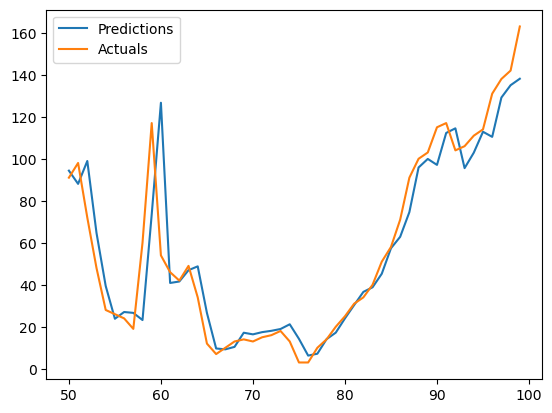

In [27]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100],label= 'Predictions')
plt.plot(train_results['Actuals'][50:100], label= 'Actuals')
plt.legend()

In [28]:
val_predictions = model2.predict(X1_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y1_val})
val_results.head()

157/157 [==============================] - 0s 784us/step


,Val Predictions,Actuals
0,12.578683,9.0
1,11.473931,11.0
2,13.241694,10.0
3,11.938414,10.0
4,11.892578,10.0


In [29]:
test_predictions = model2.predict(X1_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y1_test})
test_results

158/158 [==============================] - 0s 1ms/step


,Test Predictions,Actuals
0,74.730911,51.000000
1,43.308479,35.000000
2,29.216206,27.333333
3,24.688715,19.666667
4,19.821320,12.000000
...,...,...
5049,18.778181,12.000000
5050,18.527884,13.000000
5051,19.710115,16.000000
5052,22.097113,21.000000


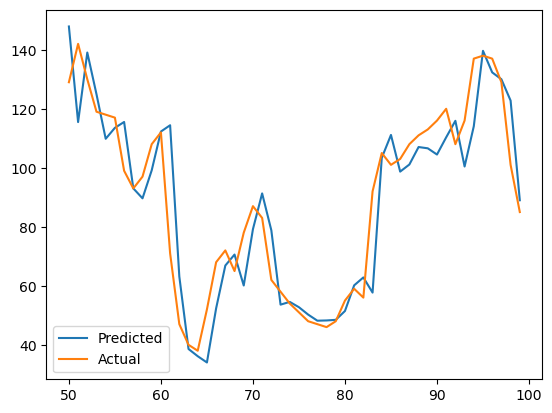

In [30]:
plt.plot(test_results['Test Predictions'][50:100], label='Predicted')
plt.plot(test_results['Actuals'][50:100], label='Actual')
plt.legend()

In [31]:
val_predictions = model2.predict(X1_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y1_val})
val_results.head()

157/157 [==============================] - 0s 875us/step


,Val Predictions,Actuals
0,12.578683,9.0
1,11.473931,11.0
2,13.241694,10.0
3,11.938414,10.0
4,11.892578,10.0


In [32]:
test_predictions = model2.predict(X1_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y1_test})
test_results

158/158 [==============================] - 0s 955us/step


,Test Predictions,Actuals
0,74.730911,51.000000
1,43.308479,35.000000
2,29.216206,27.333333
3,24.688715,19.666667
4,19.821320,12.000000
...,...,...
5049,18.778181,12.000000
5050,18.527884,13.000000
5051,19.710115,16.000000
5052,22.097113,21.000000


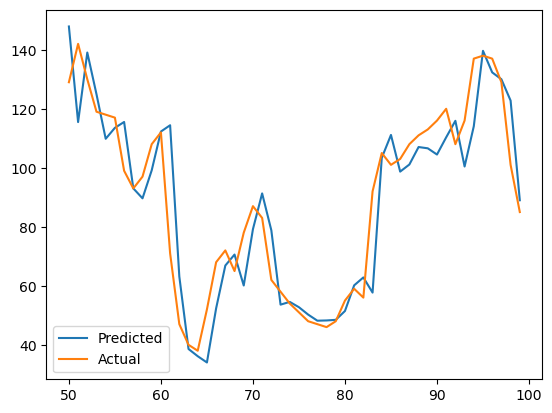

In [33]:
plt.plot(test_results['Test Predictions'][50:100], label='Predicted')
plt.plot(test_results['Actuals'][50:100], label='Actual')
plt.legend()

In [34]:
test_results['naive_seasonal'] = np.concatenate((y1_train[-54:], y1_val))
test_results.head()

,Test Predictions,Actuals,naive_seasonal
0,74.730911,51.000000,20.0
1,43.308479,35.000000,14.0
2,29.216206,27.333333,12.0
3,24.688715,19.666667,11.0
4,19.821320,12.000000,13.0


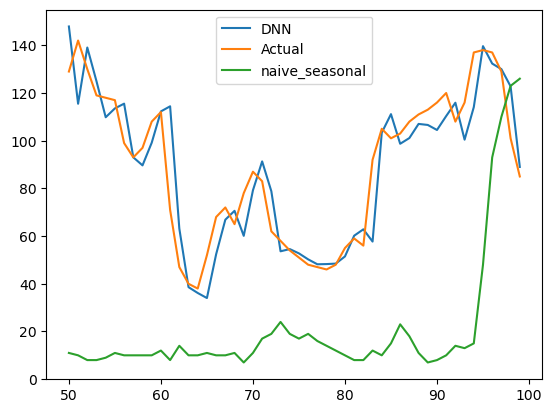

In [35]:
plt.plot(test_results['Test Predictions'][50:100], label='DNN')
plt.plot(test_results['Actuals'][50:100], label='Actual')
plt.plot(test_results['naive_seasonal'][50:100], label='naive_seasonal')
plt.legend()

In [36]:
def calculate_mape(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("The number of predicted and actual values must be the same.")
    
    sum_absolute_percentage_error = 0
    count_valid_data_points = 0
    
    for predicted, actual in zip(predicted_values, actual_values):
        if actual != 0:
            absolute_percentage_error = np.abs((actual - predicted) / actual)
            sum_absolute_percentage_error += absolute_percentage_error
            count_valid_data_points += 1
    
    if count_valid_data_points > 0:
        mape = (sum_absolute_percentage_error / count_valid_data_points) * 100
        return mape
    else:
        return None

In [37]:
mape_DNN = calculate_mape(test_results['Test Predictions'], test_results['Actuals'])

mape_naive_seasonal = calculate_mape(test_results['naive_seasonal'], test_results['Actuals'])

print(mape_DNN,mape_naive_seasonal)

32.34394474836846 240.5626529651297


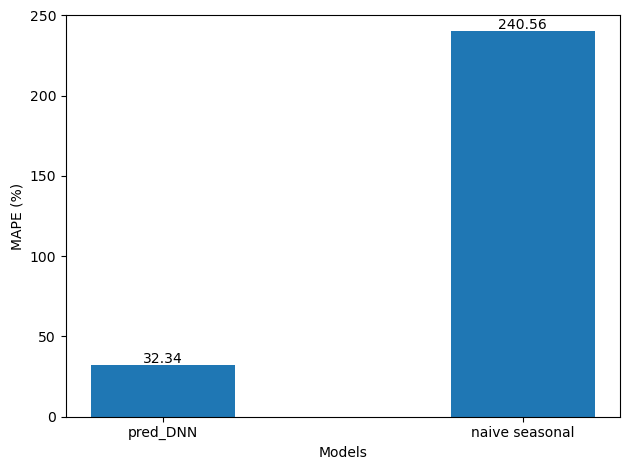

In [38]:
fig, ax = plt.subplots()

x = ['pred_DNN','naive seasonal']
y = [mape_DNN,mape_naive_seasonal]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 250)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

CNN

In [39]:
model1 = Sequential()
#model1.add(InputLayer(WINDOW_SIZE,1))
model1.add(Conv1D(32, 2, activation='relu', input_shape=(10,4)))
model1.add(Flatten())
model1.add(Dense(16,'relu'))
model1.add(Dense(8,'relu'))
# model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 32)             288       
                                                                 
 flatten_1 (Flatten)         (None, 288)               0         
                                                                 
 dense_4 (Dense)             (None, 16)                4624      
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5057 (19.75 KB)
Trainable params: 5057 (19.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
